In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
from pandas import Series, DataFrame

%matplotlib inline

In [2]:
result_df = pd.read_csv('data/us/2016-us-ge-by-county.csv')
result_df.drop('StateCode', axis=1, inplace=True)
result_df.drop('CountyFips', axis=1, inplace=True)
result_df.head()

,StateName,CountyName,CountyTotalVote,Party,Candidate,VoteCount
0,alaska,Alaska,246588,GOP,Trump,130415.0
1,alabama,Macon,8748,GOP,Trump,1394.0
2,alabama,Wilcox,6095,GOP,Trump,1737.0
3,alabama,Coosa,5223,GOP,Trump,3376.0
4,alabama,Blount,25384,GOP,Trump,22808.0


In [3]:
r = (result_df['Candidate'] == 'Trump')
print(type(r))
r

<class 'pandas.core.series.Series'>


0         True
1         True
2         True
3         True
4         True
5         True
6         True
7         True
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
15535    False
15536    False
15537    False
15538    False
15539    False
15540    False
15541    False
15542    False
15543    False
15544    False
15545    False
15546    False
15547    False
15548    False
15549    False
15550    False
15551    False
15552    False
15553    False
15554    False
15555    False
15556    False
15557    False
15558    False
15559    False
15560    False
15561    False
15562    False
15563    False
15564    False
Name: Candidate, Length: 15565, dtype: bool

In [4]:
# 提取Trump数据
trump_df = result_df[result_df['Candidate'] == 'Trump']
trump_df.info()
trump_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3113 entries, 0 to 3112
Data columns (total 6 columns):
StateName          3113 non-null object
CountyName         3113 non-null object
CountyTotalVote    3113 non-null int64
Party              3113 non-null object
Candidate          3113 non-null object
VoteCount          3113 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 170.2+ KB


,StateName,CountyName,CountyTotalVote,Party,Candidate,VoteCount
0,alaska,Alaska,246588,GOP,Trump,130415.0
1,alabama,Macon,8748,GOP,Trump,1394.0
2,alabama,Wilcox,6095,GOP,Trump,1737.0
3,alabama,Coosa,5223,GOP,Trump,3376.0
4,alabama,Blount,25384,GOP,Trump,22808.0


In [5]:
# Clinton
clinton_df = result_df[result_df['Candidate'] == 'Clinton']
clinton_df.info()
clinton_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3113 entries, 3113 to 6225
Data columns (total 6 columns):
StateName          3113 non-null object
CountyName         3113 non-null object
CountyTotalVote    3113 non-null int64
Party              3113 non-null object
Candidate          3113 non-null object
VoteCount          3113 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 170.2+ KB


,StateName,CountyName,CountyTotalVote,Party,Candidate,VoteCount
3113,alaska,Alaska,246588,DEM,Clinton,93007.0
3114,alabama,Macon,8748,DEM,Clinton,7237.0
3115,alabama,Wilcox,6095,DEM,Clinton,4329.0
3116,alabama,Coosa,5223,DEM,Clinton,1780.0
3117,alabama,Blount,25384,DEM,Clinton,2150.0


In [6]:
# 合并成一张表并却却按州分组
result_df = pd.merge(trump_df, clinton_df, 
                     on=['StateName', 'CountyName', 'CountyTotalVote'], 
                     suffixes=['_t', '_c'])
print(result_df.head())
result_df.drop('Party_t', axis=1, inplace=True)
result_df.drop('Party_c', axis=1, inplace=True)
result_df.drop('Candidate_t', axis=1, inplace=True)
result_df.drop('Candidate_c', axis=1, inplace=True)
result_df.columns = ['StateName', 'CountyName', 'TotalVote', 'VoteTrump', 'VoteClinton']
result_df = result_df.groupby(by=result_df['StateName'], as_index=False).sum() # 试下as_index不同值的区别
result_df.drop([8], inplace=True) # 删除district-of-columbia
result_df['T-Ratio'] = result_df['VoteTrump'] / result_df['TotalVote']
result_df['C-Ratio'] = result_df['VoteClinton'] / result_df['TotalVote']
result_df['Winner'] = list(map(lambda x, y: 'Trump' if x > y else 'Clinton', result_df['T-Ratio'], result_df['C-Ratio']))
print(result_df.head())
print(result_df['Winner'].value_counts())

  StateName CountyName  CountyTotalVote Party_t Candidate_t  VoteCount_t  \
0    alaska     Alaska           246588     GOP       Trump     130415.0   
1   alabama      Macon             8748     GOP       Trump       1394.0   
2   alabama     Wilcox             6095     GOP       Trump       1737.0   
3   alabama      Coosa             5223     GOP       Trump       3376.0   
4   alabama     Blount            25384     GOP       Trump      22808.0   

  Party_c Candidate_c  VoteCount_c  
0     DEM     Clinton      93007.0  
1     DEM     Clinton       7237.0  
2     DEM     Clinton       4329.0  
3     DEM     Clinton       1780.0  
4     DEM     Clinton       2150.0  
    StateName  TotalVote  VoteTrump  VoteClinton   T-Ratio   C-Ratio   Winner
0     alabama    2078165  1306925.0     718084.0  0.628884  0.345538    Trump
1      alaska     246588   130415.0      93007.0  0.528878  0.377176    Trump
2     arizona    1960053   972900.0     888374.0  0.496364  0.453240    Trump
3    arka

In [7]:
# 收入数据来源：https://en.wikipedia.org/wiki/List_of_U.S._states_by_income
income_df = pd.read_csv('data/us/2015-us-income-by-county.csv')
income_df.info()
print(income_df.head())
print(income_df.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
StateName    50 non-null object
Income       50 non-null int64
dtypes: int64(1), object(1)
memory usage: 880.0+ bytes
     StateName  Income
0     maryland   75847
1       hawaii   73486
2       alaska   73355
3   new-jersey   72222
4  connecticut   71346
        StateName  Income
45       kentucky   45215
46        alabama   44765
47  west-virginia   42019
48       arkansas   41995
49    mississippi   40593


In [8]:
# 合并收入数据
result_df = pd.merge(result_df, income_df, on=['StateName'])
result_df.head()

,StateName,TotalVote,VoteTrump,VoteClinton,T-Ratio,C-Ratio,Winner,Income
0,alabama,2078165,1306925.0,718084.0,0.628884,0.345538,Trump,44765
1,alaska,246588,130415.0,93007.0,0.528878,0.377176,Trump,73355
2,arizona,1960053,972900.0,888374.0,0.496364,0.453240,Trump,51492
3,arkansas,1121684,677904.0,378729.0,0.604363,0.337643,Trump,41995
4,california,8930459,2969532.0,5488261.0,0.332517,0.614555,Clinton,64500


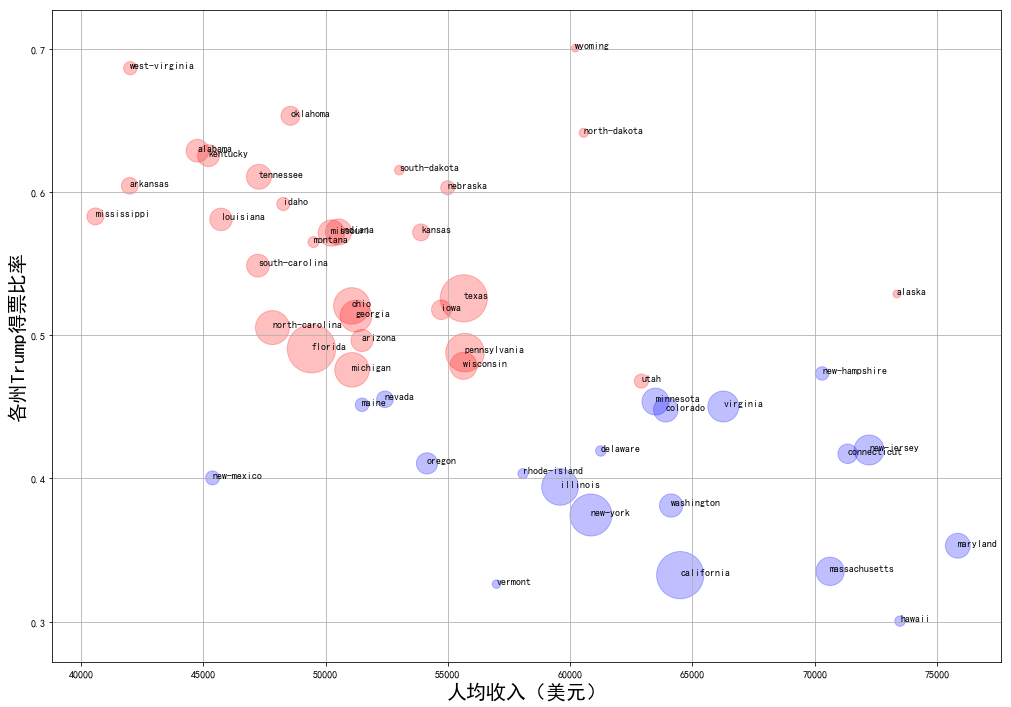

In [15]:
plt.rcParams['font.sans-serif']=['SimHei'] # 用来正常显示中文标签
colors = result_df.Winner.map({'Trump':'Red', 'Clinton':'Blue'}) # 根据赢家设置颜色
spot_size = result_df.TotalVote / 4000.0 # 设置点大小
plt.figure(figsize=(17, 12)) 
plt.scatter(x = result_df['Income'], 
            y = result_df['T-Ratio'],
            s=spot_size,
            c=colors,
            alpha=0.25)
# plt.scatter( x = result_df['Income'], y = result_df['T-Ratio'], s=spot_size, alpha=0.25)
plt.xlabel('人均收入（美元）',fontsize=20)
plt.ylabel('各州Trump得票比率',fontsize=20)
'''
spot_size = result_df['T-Ratio'] * 200 # 设置点大小
plt.figure(figsize=(17, 12)) 
plt.scatter(x = result_df['Income'], 
            y = result_df['TotalVote'],
            s=spot_size,
            c=colors,
            alpha=0.25)
# plt.scatter( x = result_df['Income'], y = result_df['T-Ratio'], s=spot_size, alpha=0.25)
plt.xlabel('人均收入（美元）',fontsize=20)
plt.ylabel('各州投票人数',fontsize=20)
'''
for i, (x, y) in enumerate(zip(result_df["Income"], result_df["T-Ratio"])):
    plt.annotate(result_df.loc[i, "StateName"] ,xy=(x,y))
plt.grid(True) # 添加网格
plt.show()